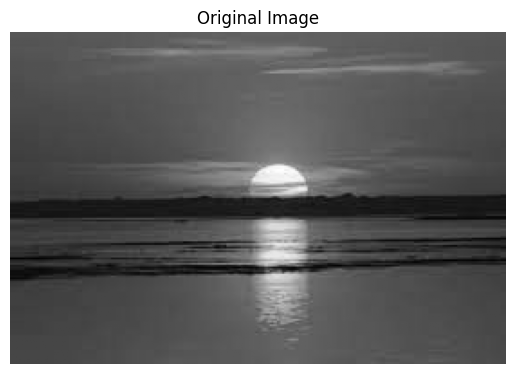

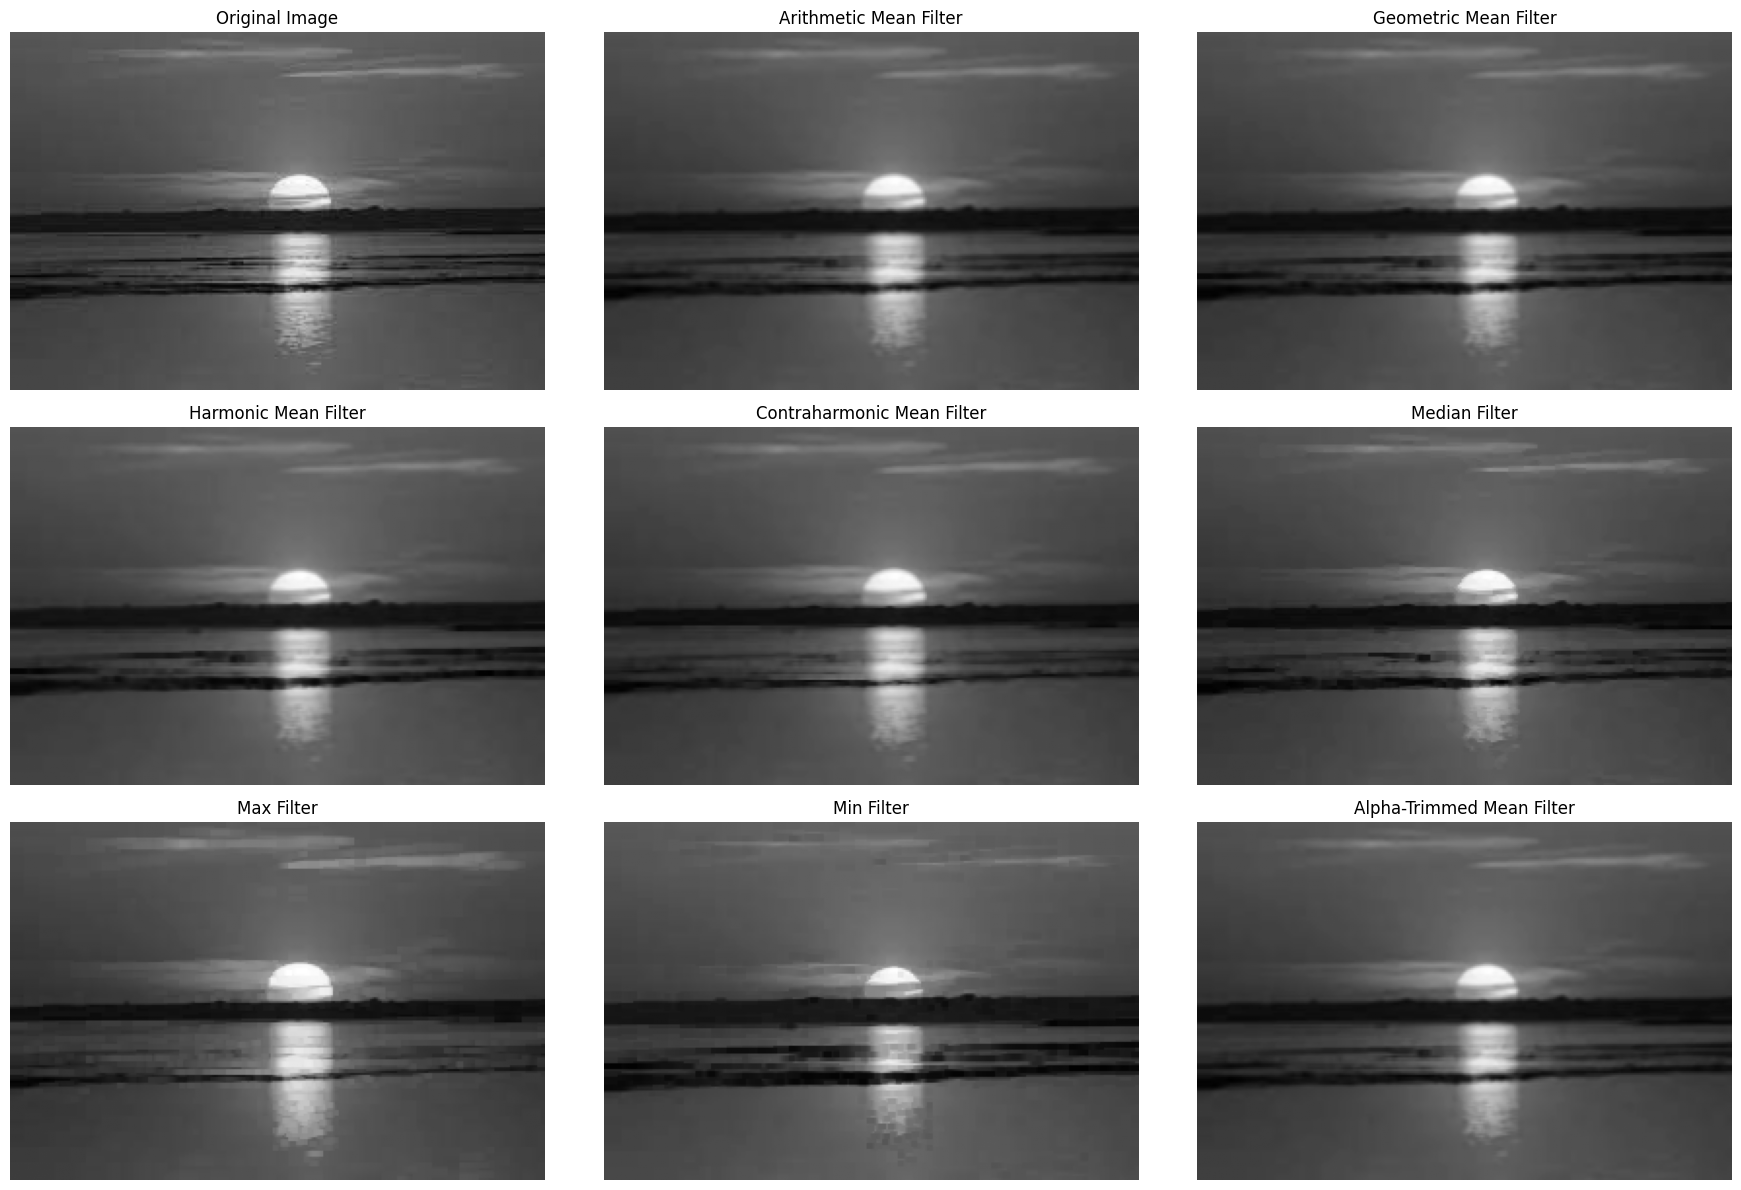

In [1]:
from scipy.ndimage import generic_filter, median_filter, minimum_filter, maximum_filter

from PIL import Image
import numpy as np

# Load the image from a file
image_path = "/content/evening.jpeg"  # Replace with the path to your image
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert the image to a numpy array for processing
image_array = np.array(original_image)

# Display the original image
import matplotlib.pyplot as plt
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


# Define filters
def arithmetic_mean_filter(block):
    return np.mean(block)

def geometric_mean_filter(block):
    block = block[block > 0]  # Avoid log(0) or division by zero
    return np.exp(np.mean(np.log(block)))

def harmonic_mean_filter(block):
    block = block[block > 0]  # Avoid division by zero
    return len(block) / np.sum(1.0 / block)

def contraharmonic_mean_filter(block, Q=1.5):
    numerator = np.sum(block ** (Q + 1))
    denominator = np.sum(block ** Q)
    return numerator / denominator if denominator != 0 else 0

def midpoint_filter(block):
    return (np.max(block) + np.min(block)) / 2

def alpha_trimmed_mean_filter(block, alpha=2):
    trimmed = np.sort(block)[alpha // 2 : -alpha // 2]  # Trim alpha elements
    return np.mean(trimmed)

# Apply filters
neighborhood_size = 3

# Arithmetic Mean Filter
arithmetic_mean_result = generic_filter(image_array, arithmetic_mean_filter, size=neighborhood_size)

# Geometric Mean Filter
geometric_mean_result = generic_filter(image_array, geometric_mean_filter, size=neighborhood_size)

# Harmonic Mean Filter
harmonic_mean_result = generic_filter(image_array, harmonic_mean_filter, size=neighborhood_size)

# Contraharmonic Mean Filter
contraharmonic_mean_result = generic_filter(image_array, contraharmonic_mean_filter, size=neighborhood_size, extra_arguments=(1.5,))

# Median Filter
median_result = median_filter(image_array, size=neighborhood_size)

# Max Filter
max_result = maximum_filter(image_array, size=neighborhood_size)

# Min Filter
min_result = minimum_filter(image_array, size=neighborhood_size)

# Midpoint Filter
midpoint_result = generic_filter(image_array, midpoint_filter, size=neighborhood_size)

# Alpha-Trimmed Mean Filter
alpha_trimmed_result = generic_filter(image_array, alpha_trimmed_mean_filter, size=neighborhood_size, extra_arguments=(2,))

# Plot results
plt.figure(figsize=(18, 12))

# Original Image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')

# Arithmetic Mean Filter
plt.subplot(3, 3, 2)
plt.title("Arithmetic Mean Filter")
plt.imshow(arithmetic_mean_result, cmap='gray')
plt.axis('off')

# Geometric Mean Filter
plt.subplot(3, 3, 3)
plt.title("Geometric Mean Filter")
plt.imshow(geometric_mean_result, cmap='gray')
plt.axis('off')

# Harmonic Mean Filter
plt.subplot(3, 3, 4)
plt.title("Harmonic Mean Filter")
plt.imshow(harmonic_mean_result, cmap='gray')
plt.axis('off')

# Contraharmonic Mean Filter
plt.subplot(3, 3, 5)
plt.title("Contraharmonic Mean Filter")
plt.imshow(contraharmonic_mean_result, cmap='gray')
plt.axis('off')

# Median Filter
plt.subplot(3, 3, 6)
plt.title("Median Filter")
plt.imshow(median_result, cmap='gray')
plt.axis('off')

# Max Filter
plt.subplot(3, 3, 7)
plt.title("Max Filter")
plt.imshow(max_result, cmap='gray')
plt.axis('off')

# Min Filter
plt.subplot(3, 3, 8)
plt.title("Min Filter")
plt.imshow(min_result, cmap='gray')
plt.axis('off')

# Alpha-Trimmed Mean Filter
plt.subplot(3, 3, 9)
plt.title("Alpha-Trimmed Mean Filter")
plt.imshow(alpha_trimmed_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
